In [98]:
!pip install CoolProp

In [99]:
from CoolProp.CoolProp import PropsSI

Design an ocean thermal energy conversion (OTEC) system. The high and low temperatures are $T_H$ and $T_C$, respectively. Optimize for minimum cost.

In [100]:
fluid1 = 'water'
fluid2 = 'ammonia'

In [101]:
TH_C = 26.53
TC_C = 8.07

p0_Pa = 101325

In [102]:
T1_K = TH_C+273.15 # warm water inlet
T2_K = 25.17+273.15 # warm water outlet

T3_K = TC_C+273.15 # cold water inlet
T4_K = 9.06+273.15 # cold water outlet

T5_K = 23.39+273.15 # turbine inlet
T6_K = 11.11+273.15 # turbine outlet

In [103]:
V12_m3PerS = 341.6

In [104]:
# state 1
h1 = PropsSI('H','T',T1_K,'P',p0_Pa,fluid1)
s1 = PropsSI('S','T',T1_K,'P',p0_Pa,fluid1)
v1 = 1/PropsSI('D','T',T1_K,'P',p0_Pa,fluid1)

In [105]:
# state 2
h2 = PropsSI('H','T',T2_K,'P',p0_Pa,fluid1)
s2 = PropsSI('S','T',T2_K,'P',p0_Pa,fluid1)
v2 = 1/PropsSI('D','T',T2_K,'P',p0_Pa,fluid1)

In [106]:
mdot12_kgPerS = V12_m3PerS/v1; print(mdot12_kgPerS)

340453.62379665766


In [107]:
Qdot12_W = mdot12_kgPerS*(h1-h2)
Qdot12_MW = Qdot12_W/1e6; print(Qdot12_MW)

1935.8676078434546


In [108]:
# state 5
p5_Pa = 0.8*953876
p5 = p5_Pa

h5 = PropsSI('H','T',T5_K,'P',p5_Pa,fluid2)
s5 = PropsSI('S','T',T5_K,'P',p5_Pa,fluid2)
v5 = 1/PropsSI('D','T',T5_K,'P',p5_Pa,fluid2)

In [109]:
# state 6
s6 = s5

h6 = PropsSI('H','T',T6_K,'S',s6,fluid2)
p6 = PropsSI('P','T',T6_K,'S',s6,fluid2)
v6 = 1/PropsSI('D','T',T6_K,'S',s6,fluid2)

In [110]:
# state 7
q7 = 0
p7 = p6

h7 = PropsSI('H','Q',q7,'P',p7,fluid2)
s7 = PropsSI('S','Q',q7,'P',p7,fluid2)
v7 = 1/PropsSI('D','Q',q7,'P',p7,fluid2)
T7 = PropsSI('T','Q',q7,'P',p7,fluid2); print(T7)

283.99165518644486


In [111]:
# state 8
s8 = s7
p8 = p5

h8 = PropsSI('H','S',s8,'P',p8,fluid2)
T8 = PropsSI('T','S',s8,'P',p8,fluid2); print(T8)
v8 = 1/PropsSI('D','S',s8,'P',p8,fluid2)

284.02081838728117


In [112]:
mdot85_kgPerS = Qdot12_W/(h5-h8); print(mdot85_kgPerS)

1552.6383084678755


In [113]:
Q67_W = mdot85_kgPerS*(h6 - h7)
Q67_MW = Q67_W/1e6; print(Q67_MW)

1898.609529880202


In [114]:
eta = (Qdot12_W-Q67_W)/Qdot12_W; print(eta)

0.019246191119834805


In [115]:
W56_W = mdot85_kgPerS*(h5-h6)
W56_MW = W56_W/1e6; print(W56_MW)

37.58235795077047


In [116]:
W78_W = mdot85_kgPerS*(h8-h7)
W78_MW = W78_W/1e6; print(W78_MW)

0.3242799875181267


In [117]:
eta_ = (W56_W-W78_W)/Qdot12_W; print(eta_)

0.019246191119834707


In [118]:
eta_carnot = 1 - ((8.07+273.15)/(26.53+273.15)); print(eta_carnot)

0.061599038974906484


In [119]:
import numpy as np
import matplotlib.pyplot as plt

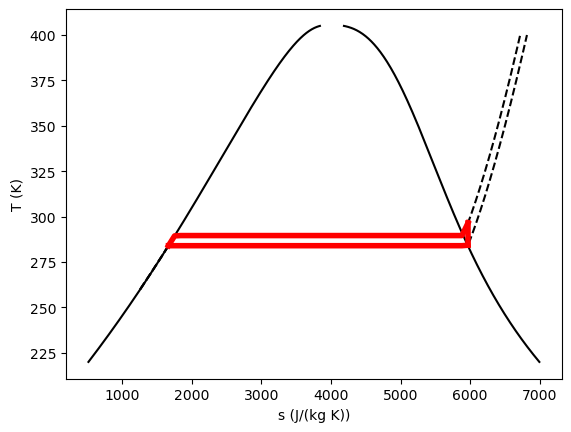

In [120]:
plt.figure()
plt.clf()
T2 = np.linspace(260, 400, 500) # range of temperatures
for P in [p5_Pa,p6]: #MPa
    S = [PropsSI('S','P',P,'T',t,fluid2) for t in T2]
    plt.plot(S, T2, 'k--')
    
# saturated vapor and liquid entropy lines
Tsat2 = np.linspace(220, 405, 1000) # range of temperatures
svap2 = [PropsSI('S','T',t,'Q',1,fluid2) for t in Tsat2]
sliq2 = [PropsSI('S','T',t,'Q',0,fluid2) for t in Tsat2]

plt.plot(svap2, Tsat2, 'k-')
plt.plot(sliq2, Tsat2, 'k-')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
# plt.savefig('carbonDioxideRefrigerationTS.png')

plt.plot([s5, s6], [T5_K, T6_K], 'r-', lw=4) # Path 5 to 6

S67 = np.linspace(s6, s7)
T67 = [PropsSI('T','P',p6,'S',s,fluid2) for s in S67]
plt.plot(S67,T67, 'r-', lw=4)

plt.plot([s7, s8], [T7, T8], 'r-', lw=4) # path from 7 to 8

S85 = np.linspace(s8, s5)
T85 = [PropsSI('T','P',p5,'S',s,fluid2) for s in S85]
plt.plot(S85,T85, 'r-', lw=4)